# Model Definition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input

def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path, header=None)
    test_df = pd.read_csv(test_path, header=None)

    x_train = train_df.iloc[:, 1:].values.astype('float32')
    y_train = train_df.iloc[:, 0].values.astype('int32')
    x_test = test_df.iloc[:, 1:].values.astype('float32')
    y_test = test_df.iloc[:, 0].values.astype('int32')

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

    return x_train, y_train, x_val, y_val, x_test, y_test

def build_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(47, activation='softmax')  # 47 classes for EMNIST Balanced
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, epochs=1, batch_size=128):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {accuracy:.4f}')
    print(f'Loss accuracy: {loss:.4f}')
    return history

def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Emnist Dataset

In [2]:
train_path = '../data/emnist/emnist-balanced-train.csv'
test_path = '../data/emnist/emnist-balanced-test.csv'

x_train, y_train, x_val, y_val, x_test, y_test = load_data(train_path, test_path)
model = build_model()
history = train_and_evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test)
plot_history(history)
# model.save('emnist_cnn_model.h5')

In [ ]:
# Initialize an empty dictionary
label_dictionary = {}

# Open the file and read its contents
file_path = "../data/emnist/emnist-balanced-mapping.txt"
with open(file_path, 'r') as file:
    # Read lines from the file
    lines = file.readlines()
    
    # Iterate over each line
    for line in lines:
        # Split each line based on space
        parts = line.split()
        
        # Ensure the line is in the expected format
        if len(parts) == 2:
            index = int(parts[0])  # Convert the index to integer
            ascii_value = int(parts[1])  # Convert the ASCII value to integer
            
            # Convert ASCII value to character
            character = chr(ascii_value)
            
            # Add to dictionary
            label_dictionary[index] = character

# Print the populated dictionary
print(label_dictionary)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


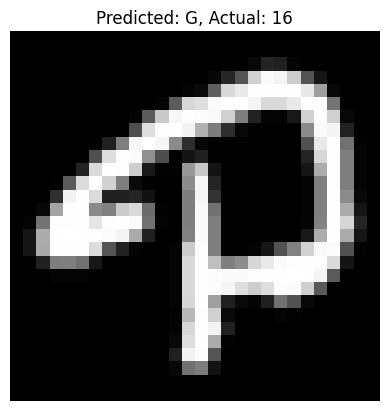

In [ ]:
example_index = 10 
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

example_index_test = 10
plt.figure()
plt.imshow(x_test[example_index_test].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {label_dictionary[predicted_labels[example_index_test]]}, Actual: {y_test[example_index_test]}')
plt.axis('off')
plt.show()